# **TikTok** data analysis
analyzing Tiktok data by practicing Exploratory data analysis and after that measuring the correlation between some variables and practicing linear & logistic regression models and hypothesis testing  
**about TikTok** data     
the TikTok data contains variables about claim status and thier video views, likes, shares and comments, and also data about verified status , author ban status. the goal of this analysis is to conduct EDA analysis to answer some questions like    
how many claim vs opinion videos ?  
the mean views, likes, shares and comments for claim vs opinion videos ?   
the mean views, likes, shares and comments for  verified accounts  vs  unverified accounts ?  
the engagement rates  for clams vs opinion videos ?  
the total views for clams vs opinion videos ?  
the total views for unverified accounts vs unverified accounts ?  
the total views for  author ban status ?  and much more ...  

and after this questions are answered, we will continue advanced analysis like hypothesis analysis and linear and logistic regression.



## **EDA** process 
  * Libraries & Data importing 
  * Data understanding   
  * Data cleaning if needed 
  * Apply data manipulation & descriptive statistics  
  * Data visualizing    

# Libraries & Data importing 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import ttest_ind 
from statsmodels.formula.api import ols 
from statsmodels.formula.api import logit  
from statsmodels.api import qqplot
import pingouin 


In [153]:
csv=pd.read_csv(r'D:\data analysis\advanced google data analytics\protfolio project-2(TikTok users classification)\work_course2/tiktok_dataset.csv')

tiktokdf=pd.DataFrame(csv)


# Data understanding  

In [154]:
tiktokdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [155]:
tiktokdf.iloc[:5,]

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


# Data cleaning 

In [156]:
# check for duplicated values
tiktokdf.duplicated().sum()

0

In [157]:
# tiktok <- na values
tiktokdf.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

* all the columns have the same number of NA values 

In [158]:
# df lens <- tiktokdf
len(tiktokdf )

19382

In [159]:
# Missing Value Ratio for the dataset
(len(tiktokdf.isna().sum())/len(tiktokdf)) * 100

0.06191311526158291

In [160]:
# Missing Value Ratio for single column
(tiktokdf['claim_status'].isna().sum() / len(tiktokdf['claim_status']))*100 


1.5375090289959756

####  the result of the missing value ratio calculation  is the following
* the missing value ratio for all the dataset equals 6 % 
* the missing value ratio for the single column equals 1.5 % 
##### the missing value dealing approch 
since the proportion of the missing values in the whole dataset  is almost 6 % and we have the same number of missing values in 7 columns (298 NA),  
and it  represents just 1.5% for a single column with 5 numeric **float** columns and two string columns. so the approch as the following :

* the columns with numeric values - dealing approch  **fill the missing values with the mean value of each column convert the column to int because the columns represent counted (discrete) values**  
* the two string columns - daeling approch  **forward fill the missing values** 

In [161]:
def nullvalues(df:any):
  """"The selected code is a function that loops through each column in a given dataframe and replaces missing values 
  with appropriate methods depending on the data type of the column.
  Specifically, if the data type is a numeric type (e.g., int, float),
  then the missing values are filled with the column's mean value.If the data type is object,
  then the missing values are filled with the previous non-missing value using the "ffill" method. Finally,
  if the data type is unknown, the function simply ignores the column."""
  for col in df :
      if df[col].dtype == float: 
        df[col].fillna(df[col].mean(),inplace=True)
        df[col] = df[col].astype(np.int64)
      elif df[col].dtype == object : 
        df[col].fillna(method='ffill',inplace=True)  
      else:
        df[col]  
  return(df)
 

nullvalues(tiktokdf)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296,19425,241,1,0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877,77355,19034,1161,684
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185,97690,2858,833,329
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506,239954,34812,1234,584
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167,34987,4110,547,152
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,opinion,7578226840,21,in our opinion a pineapple plant can only prod...,not verified,active,254708,84304,16735,1049,349
19378,19379,opinion,6079236179,53,in our opinion a pineapple plant can only prod...,not verified,active,254708,84304,16735,1049,349
19379,19380,opinion,2565539685,10,in our opinion a pineapple plant can only prod...,verified,under review,254708,84304,16735,1049,349
19380,19381,opinion,2969178540,24,in our opinion a pineapple plant can only prod...,not verified,active,254708,84304,16735,1049,349


In [162]:
# recheck missing values
tiktokdf.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [163]:
tiktokdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   #                         19382 non-null  int64 
 1   claim_status              19382 non-null  object
 2   video_id                  19382 non-null  int64 
 3   video_duration_sec        19382 non-null  int64 
 4   video_transcription_text  19382 non-null  object
 5   verified_status           19382 non-null  object
 6   author_ban_status         19382 non-null  object
 7   video_view_count          19382 non-null  int64 
 8   video_like_count          19382 non-null  int64 
 9   video_share_count         19382 non-null  int64 
 10  video_download_count      19382 non-null  int64 
 11  video_comment_count       19382 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


# **Apply data manipulation & descriptive statistics** 

1- Compile summary information about the data  
2- detailed statistics about the data    
3- Prepare for more in-depth EDA, hypothesis testing, and statistical analysis  
 

In [164]:
tiktokdf.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000,19382.000000
mean,9691.500000,5.627454e+09,32.421732,254708.550098,84304.626251,16735.244505,1049.423021,349.307347
std,5595.245794,2.536440e+09,16.229967,320401.279776,132390.843934,31788.928017,1988.831262,793.467474
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,5026.250000,833.000000,119.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,22805.500000,3705.500000,777.500000,49.000000,10.000000
75%,14536.750000,7.843960e+09,47.000000,496858.000000,122187.500000,17713.750000,1121.750000,324.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [165]:
# claim_status counts

tiktokdf['claim_status'].value_counts()

opinion    9774
claim      9608
Name: claim_status, dtype: int64

In [166]:
# claim_type values proportion 
tiktokdf['claim_status'].value_counts(normalize=True)

opinion    0.504282
claim      0.495718
Name: claim_status, dtype: float64

In [167]:
# What is the average view count of videos with "claim" status?

claims = tiktokdf[tiktokdf['claim_status'] == 'claim']
print('Mean view count claims:', claims['video_view_count'].mean())
print('Median view count claims:', claims['video_view_count'].median())

Mean view count claims: 501029.4527477102
Median view count claims: 501555.0


In [168]:
opinions = tiktokdf[tiktokdf['claim_status'] == 'opinion']
print('Mean view count opinions:', opinions['video_view_count'].mean())
print('Median view count opinions:', opinions['video_view_count'].median())

Mean view count opinions: 12571.120933087785
Median view count opinions: 5107.5


* video_view_count this right skewed distributed 

<Axes: >

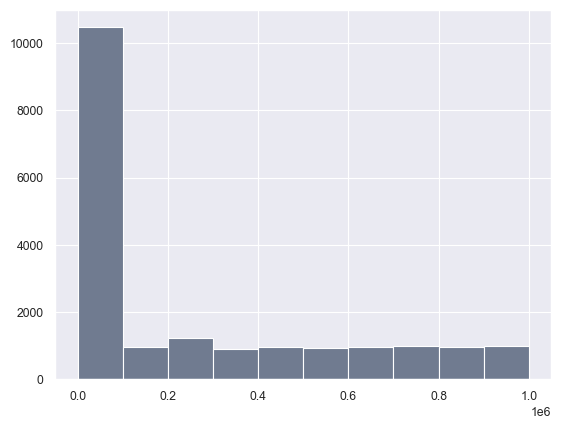

In [169]:
tiktokdf['video_view_count'].hist()

In [170]:
# group  author_ban_status stats and claim_stats
tiktokdf.groupby(['claim_status','author_ban_status']).count()[['#']].style.background_gradient()


There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:
* Claim videos are more strictly policed than opinion videos
* Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

Also, it should be noted that there's no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.

Finally, while you can use this data to draw conclusions about banned/active authors, you cannot draw conclusions about banned videos. There's no way of determining whether a particular video _caused_ the ban, and banned authors could have posted videos that complied with the terms of service.


Continue investigating engagement levels, now focusing on `author_ban_status`.

Calculate the median video share count of each author ban status.

In [171]:
 # What's the median video share count of each author ban status?
tiktokdf.groupby(['author_ban_status']).agg( {'video_share_count': ['mean', 'median']}).style.background_gradient()

Banned authors have a median and mean share count that's almost 33 times the median share count of active authors! Explore this in more depth.


In [172]:
tiktokdf.groupby(['claim_status','author_ban_status']).agg({'video_view_count':['count','mean','median','sum'],
                                          'video_like_count' : ['mean','median','sum'],
                                          'video_download_count':['mean','median','sum'],
                                          'video_share_count':['mean','median','sum']}).style.background_gradient()

### A few observations stand out:
* claim videos have a higher proportion in every possible metric than opinion videos
* In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

##### To confirm that the proportion of claim videos is higher in all engagement metrics than opinion videos let's measure the engagement rates         
createing three new columns to help better understand engagement rates:
* `likes_per_view`: represents the number of likes divided by the number of views for each video
* `comments_per_view`: represents the number of comments divided by the number of views for each video
* `shares_per_view`: represents the number of shares divided by the number of views for each video

In [173]:
tiktokdf['like_per_view']= tiktokdf['video_like_count'] / tiktokdf['video_view_count']
tiktokdf['commnt_per_view']=tiktokdf['video_comment_count'] / tiktokdf['video_view_count']
tiktokdf['shares_per_view']=tiktokdf['video_share_count']/tiktokdf['video_view_count']

In [174]:
# grouping the new columns with claim_status and author_ban_status
tiktokdf.groupby(['claim_status','author_ban_status']).agg({'like_per_view':['count','mean','median'],
                                                          'commnt_per_view' : ['mean','median'],
                                                          'shares_per_view':['mean','median']}).style.background_gradient()

now we can confirm that the claim vidoes have more angagement rate than the opinion vidoes in all metrics.

Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

# data visualizations

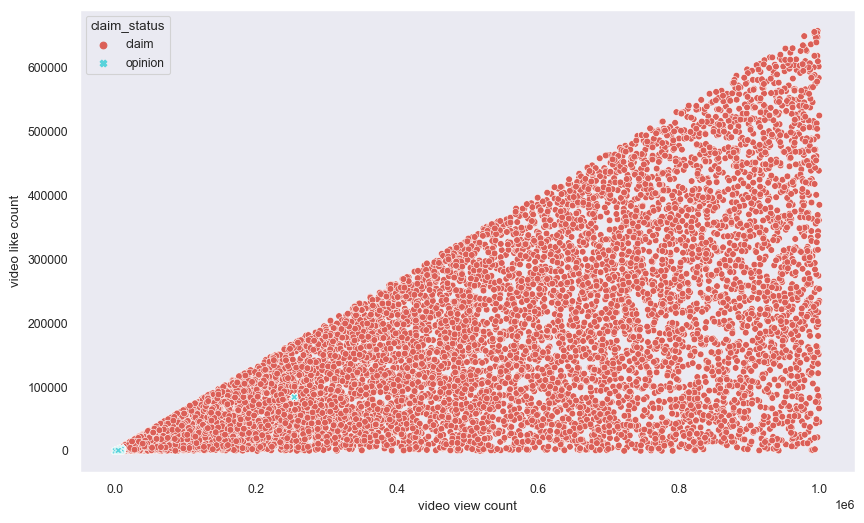

In [175]:
# creat scatter plot for claim_status  view and likes 
plt.figure(figsize=(10,6))
sns.scatterplot(data= tiktokdf,
                 x='video_view_count',
                 y='video_like_count',
                 hue='claim_status',
                 style='claim_status',
                 palette='hls')
plt.xlabel('video view count')  
plt.ylabel('video like count')  
      
plt.show()

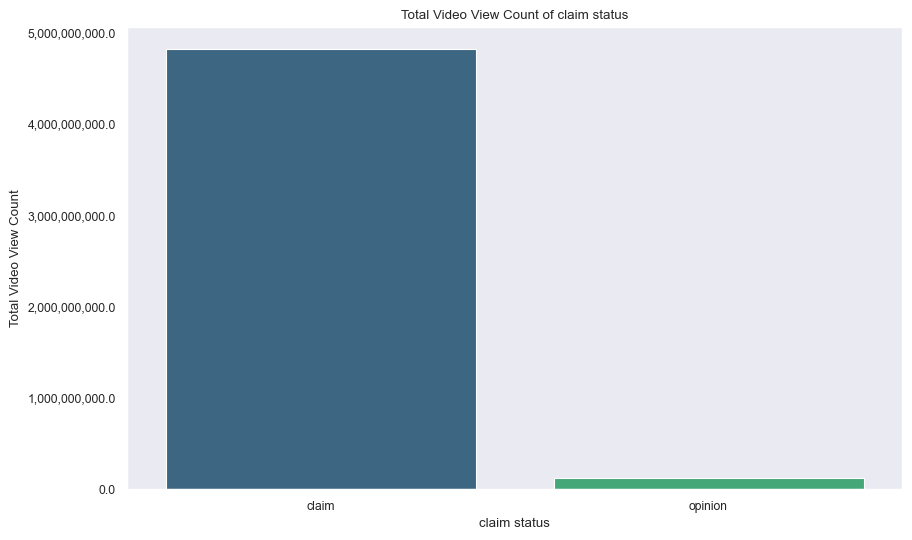

In [176]:
# Group by claim_status and author_ban_status and calculate sums
grouped_claim_status = tiktokdf.groupby(['claim_status']).agg({
    'video_view_count': 'sum'})

# Reset index to make 'author_ban_status' a column
grouped_claim_status = grouped_claim_status.reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='claim_status',
    y='video_view_count',
    data=grouped_claim_status,
    palette='viridis'  # Adjust color palette as needed
)

plt.xlabel('claim status')
plt.ylabel('Total Video View Count')
plt.title('Total Video View Count of claim status')

# Set y-axis ticks to real numbers
ax.yaxis.set_major_formatter('{:,}'.format)

plt.show()


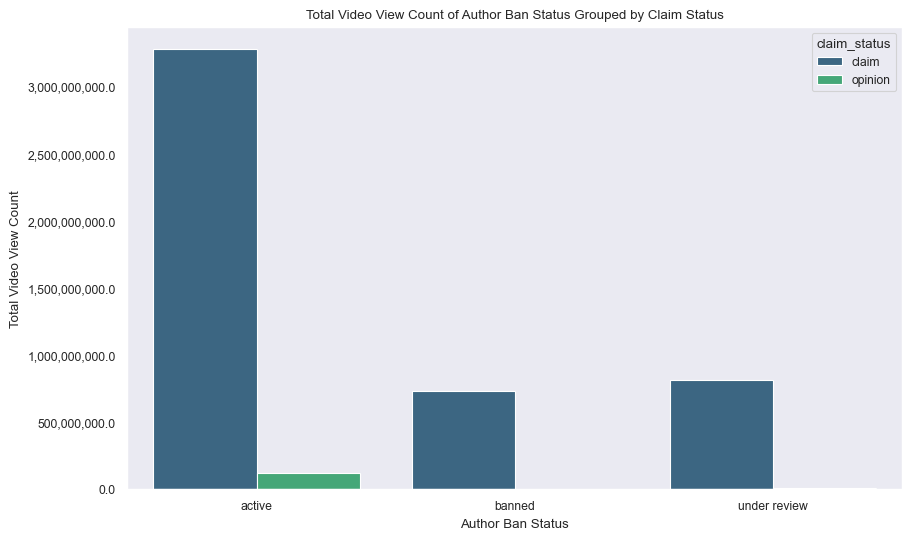

In [177]:


# Group by claim_status and author_ban_status and calculate sums
grouped_author_ban_status = tiktokdf.groupby(['author_ban_status', 'claim_status']).agg({
    'video_view_count': 'sum'})

# Reset index to make 'author_ban_status' a column
grouped_author_ban_status = grouped_author_ban_status.reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='author_ban_status',
    y='video_view_count',
    hue='claim_status',
    data=grouped_author_ban_status,
    palette='viridis'  # Adjust color palette as needed
)

plt.xlabel('Author Ban Status')
plt.ylabel('Total Video View Count')
plt.title('Total Video View Count of Author Ban Status Grouped by Claim Status')

# Set y-axis ticks to real numbers
ax.yaxis.set_major_formatter('{:,}'.format)

plt.show()


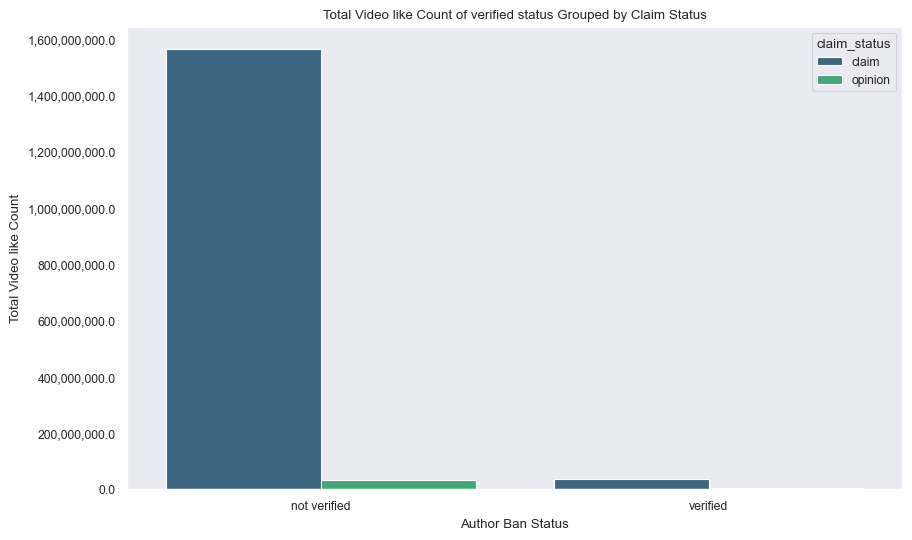

In [178]:

# Group by claim_status and author_ban_status and calculate sums
grouped_verified_status = tiktokdf.groupby(['verified_status', 'claim_status']).agg({
    'video_like_count': 'sum'})

# Reset index to make 'author_ban_status' a column
grouped_verified_status = grouped_verified_status.reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='verified_status',
    y='video_like_count',
    hue='claim_status',
    data=grouped_verified_status,
    palette='viridis'  # Adjust color palette as needed
)

plt.xlabel('Author Ban Status')
plt.ylabel('Total Video like Count')
plt.title('Total Video like Count of verified status Grouped by Claim Status')

# Set y-axis ticks to real numbers
ax.yaxis.set_major_formatter('{:,}'.format)

plt.show()


Text(0, 0.5, 'video comment count')

<Figure size 640x480 with 0 Axes>

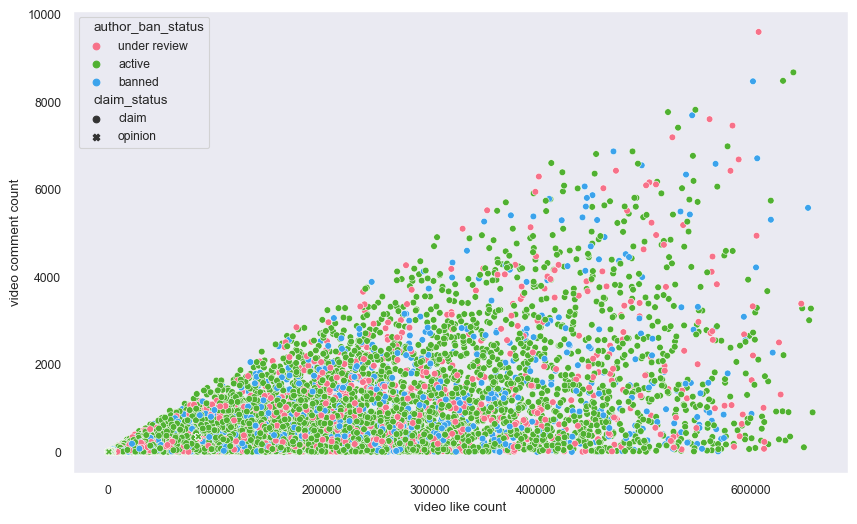

In [179]:
fig = plt.figure()
plt.figure(figsize=(10,6))
sns.scatterplot(data= tiktokdf,
                 x='video_like_count',
                 y='video_comment_count',
                 hue='author_ban_status',
                 style='claim_status'
                
                 )
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('ocean')
plt.xlabel('video like count')  
plt.ylabel('video comment count')  

### distribution of like, comment, share, video duration_sec

Text(0.5, 0, 'distribution of video comment count')

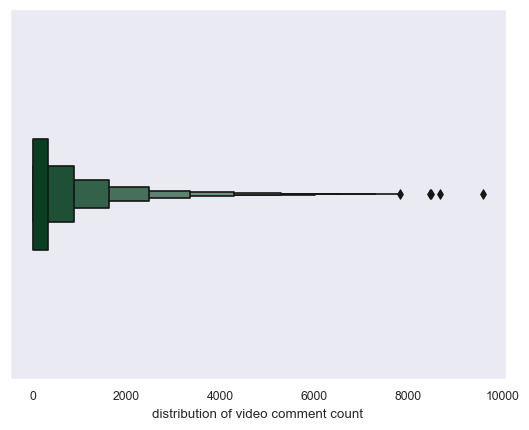

In [180]:
sns.boxenplot(x=tiktokdf['video_comment_count'],
            width=.3)
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('hot')
plt.xlabel('distribution of video comment count')  


Text(0.5, 0, 'distribution of video like count')

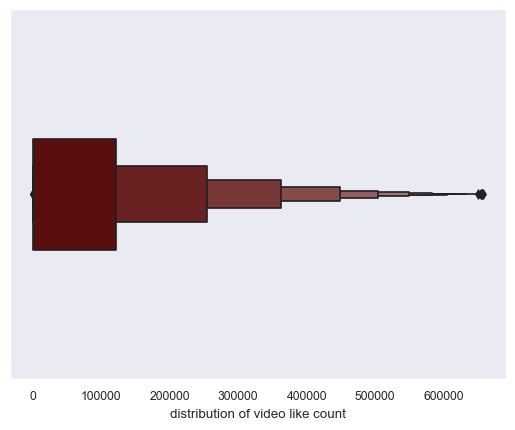

In [181]:
sns.boxenplot(x=tiktokdf['video_like_count'], width=.3
            )
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('ocean',n_colors=1)
plt.xlabel('distribution of video like count') 

Text(0.5, 0, 'distribution of video share count')

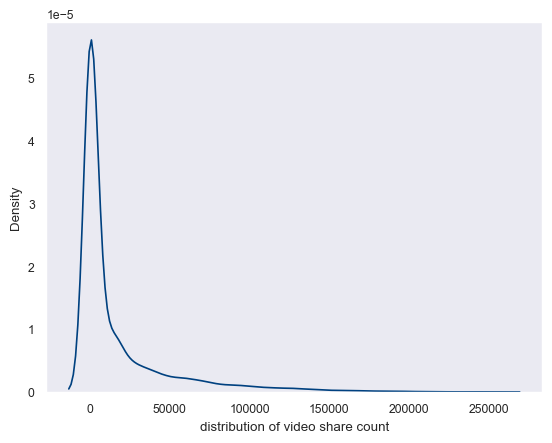

In [182]:
sns.kdeplot(x=tiktokdf['video_share_count'],
            )
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('bone',n_colors=10)
plt.xlabel('distribution of video share count') 

Text(0.5, 0, 'distribution of video duration')

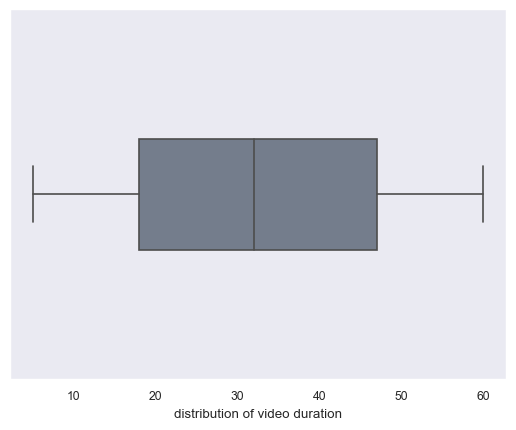

In [228]:
sns.boxplot(x=tiktokdf['video_duration_sec'],
            width=.3)
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('icefire',n_colors=15)
plt.xlabel('distribution of video duration') 

the video like, comment, and share all of them are right-tailed  distributed, and video duration is normally distributed. Therefore the next step is to discover the outlier values in video view and like count .

### discover the outliers

view_upper_limet : 1234605.625
view_100 : 999817
view_lower_limet : -732721.375
view_0 : 20


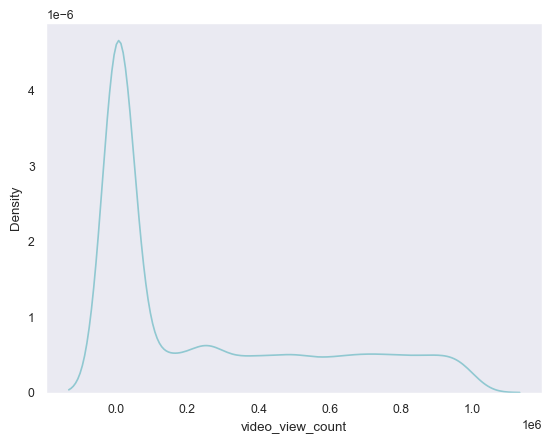

In [184]:
# view quantils and inter quarter range 
view_iqr=iqr(tiktokdf['video_view_count'])
view_Q3= np.quantile(tiktokdf['video_view_count'],.75) # the data point that represents 75 percent of the data.
view_Q1= np.quantile(tiktokdf['video_view_count'],.25) # the data point that represents 25 percent of the data.
view_upper_limet =view_Q3+1.5*view_iqr
view_lower_limet=view_Q1-1.5*view_iqr
view_100= np.quantile(tiktokdf['video_view_count'],1) ## highest point in the data 
view_0= np.quantile(tiktokdf['video_view_count'],0) ## lowest point in the data 
print('view_upper_limet :',str(view_upper_limet))
print('view_100 :',str(view_100))
print('view_lower_limet :',str(view_lower_limet))
print('view_0 :',str(view_0))
sns.kdeplot(tiktokdf['video_view_count'])
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('hot',n_colors=20)
plt.show()

there are no outliers in video_view_lower count

In [185]:
# like quantils and inter quarter range 
like_iqr=iqr(tiktokdf['video_like_count']) # inter quarter range 
like_Q3= np.quantile(tiktokdf['video_like_count'],.75) # the data point that represents 75 percent of the data.
like_Q1= np.quantile(tiktokdf['video_like_count'],.25) # the data point that represents 25 percent of the data.
like_upper_limet =like_Q3+1.5*like_iqr
like_lower_limet=like_Q1-1.5*like_iqr
like_100= np.quantile(tiktokdf['video_like_count'],1) ## highest point in the data 
like_0= np.quantile(tiktokdf['video_like_count'],0)  ## lowest point in the data 
print('like_upper_limet :',str(like_upper_limet))
print('like_100 :',str(like_100))  
print('like_lower_limet :',str(like_lower_limet))
print('like_0 :',str(like_0))


like_upper_limet : 304219.25
like_100 : 657830
like_lower_limet : -181198.75
like_0 : 0


In [186]:
# like outliers
like_outliers= tiktokdf[(tiktokdf['video_like_count'] < like_lower_limet )|(tiktokdf['video_like_count'] > like_upper_limet)]
like_outliers

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,like_per_view,commnt_per_view,shares_per_view
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345,486192,193911,8616,5446,0.647958,0.007258,0.258429
12,13,claim,3609761483,51,someone shared with me that the longest record...,not verified,active,700081,434565,97995,2408,1411,0.620735,0.002015,0.139977
13,14,claim,3850678773,20,someone shared with me that 1920 was the last ...,not verified,under review,929685,497236,154917,1225,805,0.534844,0.000866,0.166634
27,28,claim,6569363811,22,someone shared with me that sneezing while tra...,not verified,under review,812056,329068,3515,5200,1108,0.405228,0.001364,0.004329
28,29,claim,6301836558,21,someone shared with me that people don’t sneez...,not verified,active,677855,332569,97961,5531,2386,0.490620,0.003520,0.144516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9586,9587,claim,3469997668,7,a colleague discovered on the radio a claim th...,not verified,active,931007,455662,164314,10216,6809,0.489429,0.007314,0.176491
9587,9588,claim,4032914023,58,a colleague discovered on the radio a claim th...,not verified,banned,706385,456631,174090,9027,5300,0.646434,0.007503,0.246452
9597,9598,claim,9440207084,33,a colleague discovered on the radio a claim th...,not verified,active,885151,568550,79845,9700,2875,0.642320,0.003248,0.090205
9603,9604,claim,3883493316,49,a colleague discovered on the radio a claim th...,not verified,active,737177,460743,54550,8119,3372,0.625010,0.004574,0.073999


investigate more in like count to see which 'claim_status' gets more like and the count of it. and also there views


In [187]:
like_outliers.groupby(['claim_status','author_ban_status']).agg({
                                                                 'video_view_count':['count','sum'],
                                                                 'video_like_count':['sum'],
                                                                 'like_per_view':['mean','median'],
                                                                 'commnt_per_view' : ['mean','median'],
                                                                 'shares_per_view':['mean','median']}) \
.style.background_gradient()

## conduct hypothesis testing
Conduct a two-sample hypothesis test of verified versus unverified accounts in terms of video view counts

* the null hypothesis : the mean views of verified accounts is equal to the mean views ofunverified accounts
* the alternative hypothesis : the mean views of unverified accounts is greater than the mean views of verified accounts  
* the significance level : 5%  
**the sample will represent 50% percent from each category**


In [188]:
verified_people = tiktokdf[tiktokdf['verified_status']=='verified']
verified_people_sample = verified_people.sample(frac=.5,random_state=25,replace=True)


In [189]:
not_verified_people = tiktokdf[tiktokdf['verified_status']=='not verified']
not_verified_people_sample = not_verified_people.sample(frac=.5,random_state=25,replace=True)

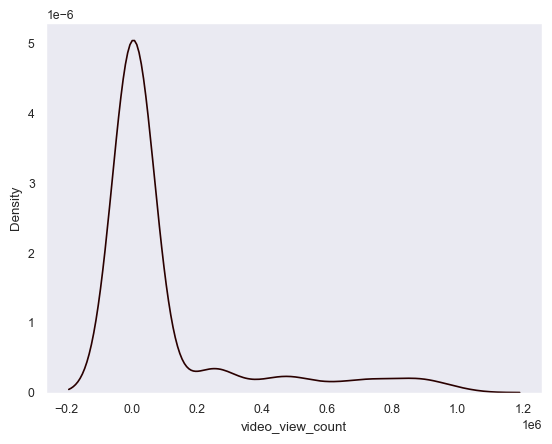

In [190]:
sns.kdeplot(verified_people_sample['video_view_count'])
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('hot',n_colors=20)
plt.show()

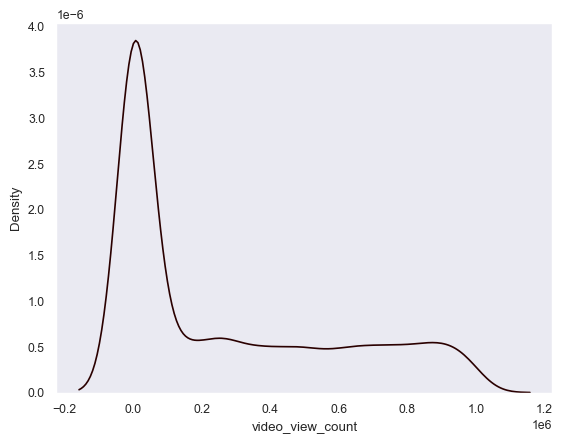

In [191]:
sns.kdeplot(not_verified_people_sample['video_view_count'])
sns.set_style('dark')
sns.set_context('paper')
sns.set_palette('bone',n_colors=1)
plt.show()

**since the video view variable is right-tailed in the two samples and not normally distributed, it's preferred to use a non-parametric t-test** 

In [336]:
verified_status_t_test = pingouin.mwu(x= not_verified_people_sample['video_view_count'],
                        y= verified_people_sample['video_view_count'],
                        alternative='greater')
print(verified_status_t_test)

         U-val alternative         p-val       RBC      CLES
MWU  3772046.5     greater  2.423252e-46 -0.341406  0.670703


In [337]:
verified_status_t_test_result={'p-val':2.423252e-46 ,
                               'significance level': .05,
                               't-test result':'reject the null hypothesis'} 
print(verified_status_t_test_result)

{'p-val': 2.423252e-46, 'significance level': 0.05, 't-test result': 'reject the null hypothesis'}


 there is statistically significant evidence that the mean views of unverified accounts are greater than the mean views of verified accounts

### conduct simple linear regression between video view and video like
* independent variable is video view 
* respondent variable is video like  
**since the the both variables are right-skewed distributed in this case, it's preferred to square root both variables.**

* measuer variables correlatiom 

In [194]:
tiktokdf['video_view_count'].corr(tiktokdf['video_like_count'])

0.804322135177882

strong relationships

Text(0.5, 1.0, 'linear regression btween sqrt of view and like')

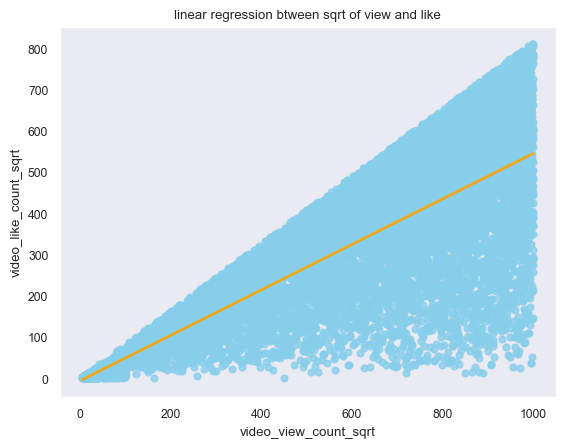

In [195]:
# regression plot between video sqrt view and sqrt like
tiktokdf['video_like_count_sqrt']=np.sqrt(tiktokdf['video_like_count'])
tiktokdf['video_view_count_sqrt']=np.sqrt(tiktokdf['video_view_count'])   
sns.regplot(data=tiktokdf,
            x=tiktokdf['video_view_count_sqrt'],
            y=tiktokdf['video_like_count_sqrt'],
            ci=None,
            color='skyblue',
            line_kws={'color':'orange'})
plt.title('linear regression btween sqrt of view and like')

create the model

In [338]:

view_vs_like_mdl = ols(' video_like_count_sqrt ~ video_view_count_sqrt',data=tiktokdf).fit()
view_vs_like_mdl.params


Intercept               -6.066274
video_view_count_sqrt    0.551029
dtype: float64

In [339]:
#  Match column name for prediction:
explanatory_data = pd.DataFrame({'video_view_count_sqrt': np.sqrt(np.arange(100000, 1000000, 10000))})
                                 
prediction_data= explanatory_data.assign(video_like_count_sqrt = view_vs_like_mdl.predict(explanatory_data))
                                         
prediction_data

,video_view_count_sqrt,video_like_count_sqrt
0,316.227766,168.184419
1,331.662479,176.689394
2,346.410162,184.815796
3,360.555128,192.610083
4,374.165739,200.109926
...,...,...
85,974.679434,531.010430
86,979.795897,533.829750
87,984.885780,536.634424
88,989.949494,539.424677


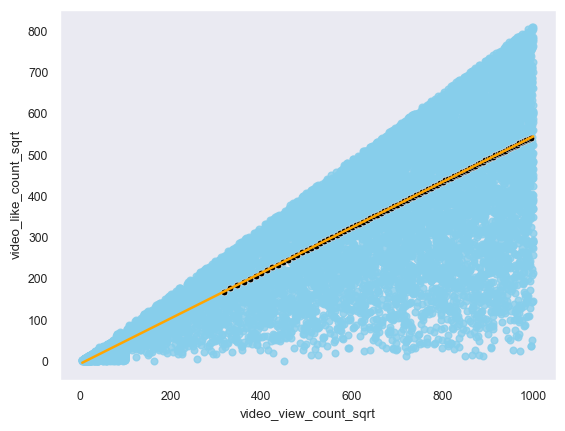

In [340]:
# visualizing the result 
fig=plt.figure()
sns.regplot(data=tiktokdf,
            x='video_view_count_sqrt',
            y='video_like_count_sqrt',
              ci=None,
            color='skyblue',
            line_kws={'color':'orange'}) 
sns.scatterplot(data=prediction_data,
                x='video_view_count_sqrt',
                y='video_like_count_sqrt',
                color='black',
                markers='s')
plt.show()

### quantify the peformance of the model 

In [341]:
view_vs_like_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     video_like_count_sqrt   R-squared:                       0.791
Model:                               OLS   Adj. R-squared:                  0.791
Method:                    Least Squares   F-statistic:                 7.340e+04
Date:                   Thu, 29 Feb 2024   Prob (F-statistic):               0.00
Time:                           06:31:09   Log-Likelihood:            -1.1617e+05
No. Observations:                  19382   AIC:                         2.323e+05
Df Residuals:                      19380   BIC:                         2.324e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -6.0663      1.026     -5.910      0.000      -8.078      -4.054
video_view_count_sqrt     0.5510      0.002    270.926      0.000       0.547       0.555
==============================================================================
Omnibus:                     3604.427   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12217.215
Skew:                          -0.931   Prob(JB):                         0.00
Kurtosis:                       6.415   Cond. No.                         744.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
# Coefficient of determination   r-squared 
view_vs_like_mdl.rsquared

0.7911206614774

the coefficient estimate for video views is 0.5510 with P value of 0.000 and 95% confidence intervals between 0.547	- 0.555  
the r-squared coefficient of determination equals 0.79 which means thet the video views count explains about 79% of the variance in video like count     model consdered a good fit     
**simplifying the result**      
if we increase the video view count by one unit then the video like count will increase by 0.5510 .   
this result is statistically significance with a 0.000 p-value and 95% confidence intervals between 0.547 -	0.555,  and an r-squared of  79%.


In [343]:
print(view_vs_like_mdl.resid)


0       -177.416144
1         77.372978
2       -204.765986
3        131.443300
4         62.522831
            ...    
19377     18.321104
19378     18.321104
19379     18.321104
19380     18.321104
19381     18.321104
Length: 19382, dtype: float64


In [344]:
# residuals standard error
mse=view_vs_like_mdl.mse_resid  #mean-squared error

rse=np.sqrt(mse) # residuals squared error
print('mean squared residuals standard error :',mse)
print('residuals squared error :',rse)

mean squared residuals standard error : 9408.609146437313
residuals squared error : 96.9979852699906


In [345]:
# check residuals squared error by calculating it manually
residuals = view_vs_like_mdl.resid **2
residuals_sum = residuals.sum()
dgree_of_freedom = len(tiktokdf)-2
rse_ = np.sqrt(residuals_sum/dgree_of_freedom)
print(rse_)

96.9979852699906


the difference between the prediction response and the observed response is 96.9979852699906

visualize the peformance of the model by using diagnostic plots

Text(0.5, 1.0, 'Residuals distribution')

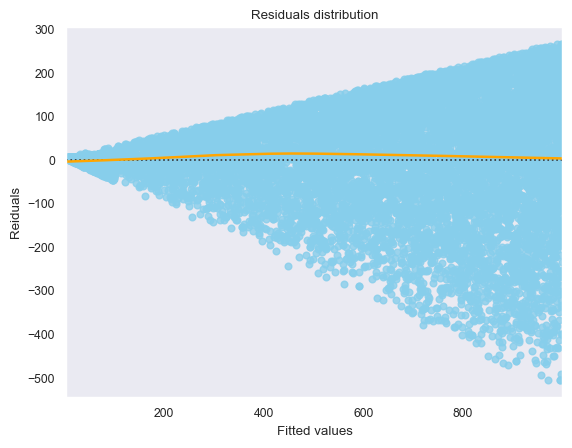

In [346]:
sns.residplot(data= tiktokdf,
              x='video_view_count_sqrt',
              y='video_like_count_sqrt',
              lowess=True,
               color='skyblue',
               line_kws={'color':'orange'})
plt.xlabel('Fitted values')
plt.ylabel('Reiduals')
plt.title('Residuals distribution')

the trend line follows the y-axis equal zero mean that the residuals are normaly distributed

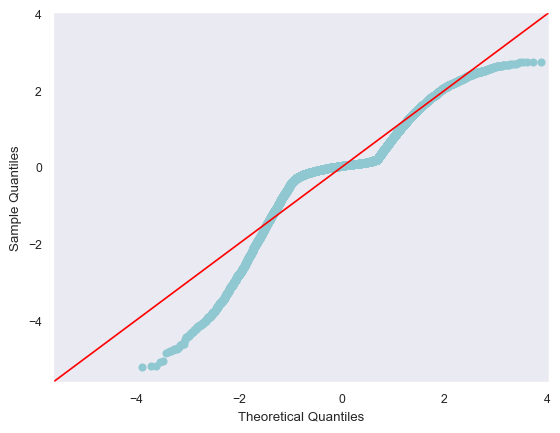

In [347]:
# qqplot
from statsmodels.api import qqplot
qqplot(data=view_vs_like_mdl.resid, fit=True, line="45")
plt.show()

**measuring leverage and influence**

In [348]:
summary_views= view_vs_like_mdl.get_influence().summary_frame()
prediction_data['leverage']= summary_views['hat_diag']

In [349]:
prediction_data['influnce']= summary_views['cooks_d']

In [360]:
print(prediction_data.sort_values(by='influnce',ascending=False).head(5))

    video_view_count_sqrt  video_like_count_sqrt  leverage  influnce
62             848.528137             461.497398  0.000213  0.002098
15             500.000000             269.448262  0.000159  0.001753
44             734.846923             398.855744  0.000170  0.000975
47             754.983444             409.951552  0.000186  0.000828
7              412.310563             221.128833  0.000112  0.000807


### conduct a simple logistic regrression on video views and cliam status 

* independent variable is video view

* respondent variable is claim status

In [351]:
# Create a dictionary to map claim_status values to numeric equivalents
claim_status_mapping = {
    "claim": 1,
    "opinion": 0
}

# Apply the mapping to the 'claim_status' column using a lambda function
tiktokdf["claim_status_numeric"] = tiktokdf["claim_status"].apply(
       lambda status:claim_status_mapping.get(status)
)
tiktokdf['claim_status_numeric'].head()

0    1
1    1
2    1
3    1
4    1
Name: claim_status_numeric, dtype: int64

In [370]:
#run the logistic model
claim_vs_views_mdl= logit('claim_status_numeric ~ video_view_count_sqrt ', data= tiktokdf ).fit()
claim_vs_views_mdl.params

Optimization terminated successfully.
         Current function value: 0.157839
         Iterations 9


Intercept               -3.961033
video_view_count_sqrt    0.015387
dtype: float64

Visualizing the linear model

<Axes: xlabel='video_view_count_sqrt', ylabel='claim_status_numeric'>

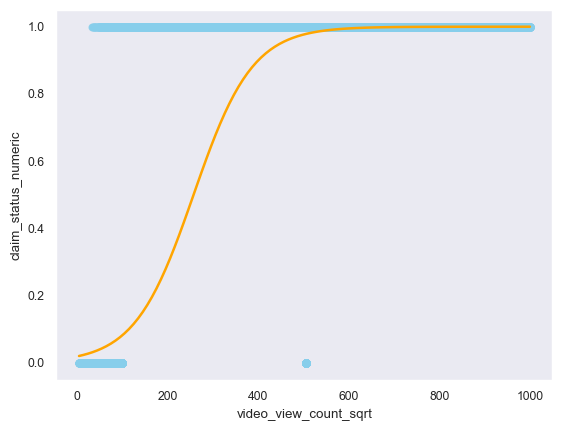

In [371]:

fig =plt.figure()
sns.regplot(data=tiktokdf,
            x='video_view_count_sqrt',
            y='claim_status_numeric',
            ci=None,
            color='skyblue',
            line_kws={'color':'orange'},
            logistic=True)



In [372]:
explanatory_data_claims= pd.DataFrame({'video_view_count_sqrt':np.sqrt(np.arange(10000,1000000,1000))})
prediction_data_claim_status = explanatory_data_claims.assign(claim_prediction=claim_vs_views_mdl.predict(explanatory_data_claims))
prediction_data_claim_status

,video_view_count_sqrt,claim_prediction
0,100.000000,0.081482
1,104.880885,0.087282
2,109.544512,0.093171
3,114.017543,0.099151
4,118.321596,0.105225
...,...,...
985,997.496867,0.999989
986,997.997996,0.999989
987,998.498873,0.999989
988,998.999499,0.999989


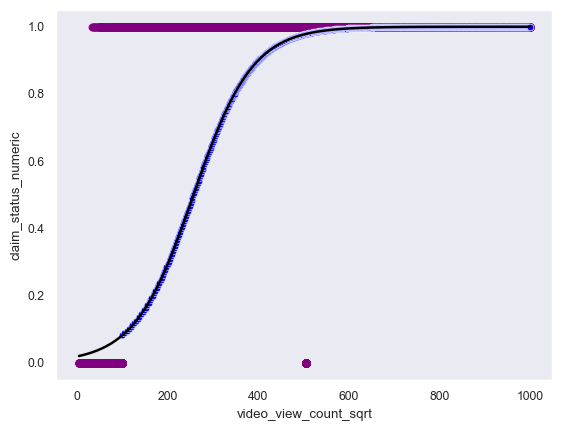

In [373]:
# visualizing the result

fig=plt.figure()
sns.regplot(data=tiktokdf,
            x='video_view_count_sqrt',
            y='claim_status_numeric',
            ci= None,
            color='purple',
            logistic=True
            ,line_kws= {'color':'black'})

sns.scatterplot(data= prediction_data_claim_status,
                x='video_view_count_sqrt',
                y='claim_prediction',
                color='blue',
                markers='s')
plt.show()


In [374]:
# round the predictions

prediction_data_claim_status['most_likely_outcomes'] = np.round(prediction_data_claim_status['claim_prediction'])
prediction_data_claim_status

,video_view_count_sqrt,claim_prediction,most_likely_outcomes
0,100.000000,0.081482,0.0
1,104.880885,0.087282,0.0
2,109.544512,0.093171,0.0
3,114.017543,0.099151,0.0
4,118.321596,0.105225,0.0
...,...,...,...
985,997.496867,0.999989,1.0
986,997.997996,0.999989,1.0
987,998.498873,0.999989,1.0
988,998.999499,0.999989,1.0


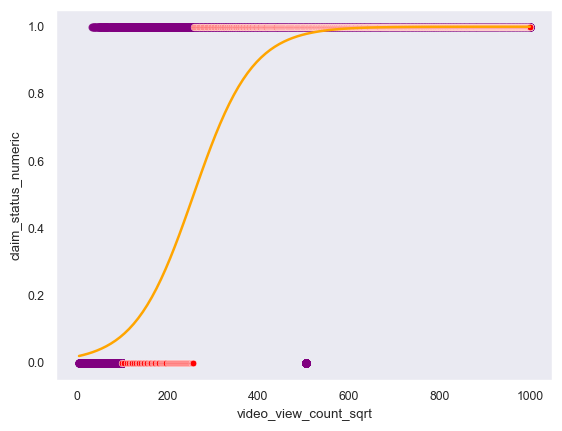

In [375]:
# visualizing the rounded predictions

fig=plt.figure()
sns.regplot(data=tiktokdf,
            x='video_view_count_sqrt',
            y='claim_status_numeric',
            ci= None,
            color='purple',
            logistic=True
            ,line_kws= {'color':'orange'})

sns.scatterplot(data= prediction_data_claim_status,
                x='video_view_count_sqrt',
                y='most_likely_outcomes',
                color='red',
                markers='s')
plt.show()

In [384]:
# add odds ratio of outcome
prediction_data_claim_status['odds_ratio'] = prediction_data_claim_status['claim_prediction']/(1-prediction_data_claim_status['claim_prediction'])
prediction_data_claim_status.head(900)

,video_view_count_sqrt,claim_prediction,most_likely_outcomes,odds_ratio
0,100.000000,0.081482,0.0,0.088711
1,104.880885,0.087282,0.0,0.095629
2,109.544512,0.093171,0.0,0.102743
3,114.017543,0.099151,0.0,0.110064
4,118.321596,0.105225,0.0,0.117599
...,...,...,...,...
895,951.314880,0.999977,1.0,43322.514183
896,951.840323,0.999977,1.0,43674.186072
897,952.365476,0.999977,1.0,44028.516277
898,952.890340,0.999977,1.0,44385.523517


Odds ratio is the probability of something
happening divided by the probability that it
doesn't.

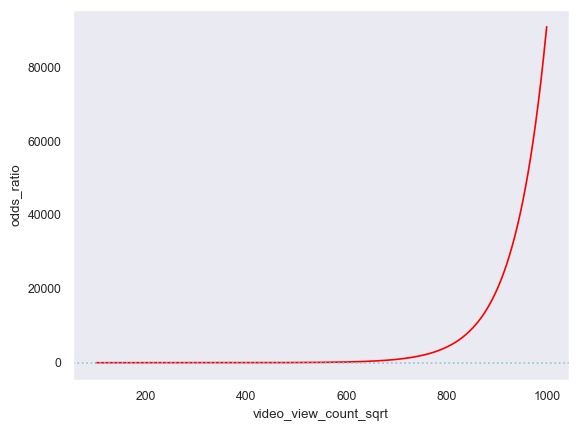

In [390]:
## Visualizing odds ratio
sns.lineplot(data= prediction_data_claim_status,
             x='video_view_count_sqrt',
             y='odds_ratio',
             color='red'
             )
plt.axhline(y=1,
linestyle="dotted")

plt.show()


In [398]:
## add log adds ratio to the prediction_data_claim_status dataframe
prediction_data_claim_status['log_odds_ratio'] = np.log(prediction_data_claim_status['odds_ratio'])

prediction_data_claim_status.head()

,video_view_count_sqrt,claim_prediction,most_likely_outcomes,odds_ratio,log_odds_ratio
0,100.000000,0.081482,0.0,0.088711,-2.422377
1,104.880885,0.087282,0.0,0.095629,-2.347277
2,109.544512,0.093171,0.0,0.102743,-2.275520
3,114.017543,0.099151,0.0,0.110064,-2.206695
4,118.321596,0.105225,0.0,0.117599,-2.140471


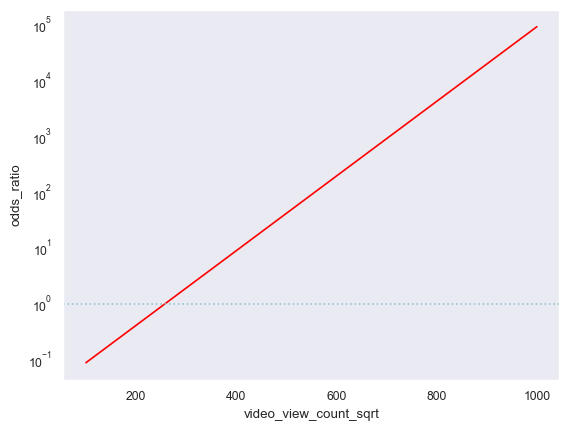

In [402]:
## Visualizing log odds ratio
sns.lineplot(data= prediction_data_claim_status,
             x='video_view_count_sqrt',
             y='odds_ratio',
             color='red'
             )
plt.axhline(y=1,
linestyle="dotted")
plt.yscale("log")
plt.show()

**Quantifying logistic regression fit**

In [424]:
actual_response= tiktokdf['claim_status_numeric']
predicted_response= np.round(claim_vs_views_mdl.predict())
outcomes=pd.DataFrame({'actual_response':actual_response,
                       'predicted_response':predicted_response})
print(outcomes.value_counts())


actual_response  predicted_response
0                0.0                   9476
1                1.0                   8945
                 0.0                    663
0                1.0                    298
dtype: int64


In [418]:
conf_matrix = claim_vs_views_mdl.pred_table()
print(conf_matrix)

[[9476.  298.]
 [ 663. 8945.]]


Normalized Confusion Matrix:
[[0.97 0.03]
 [0.07 0.93]]


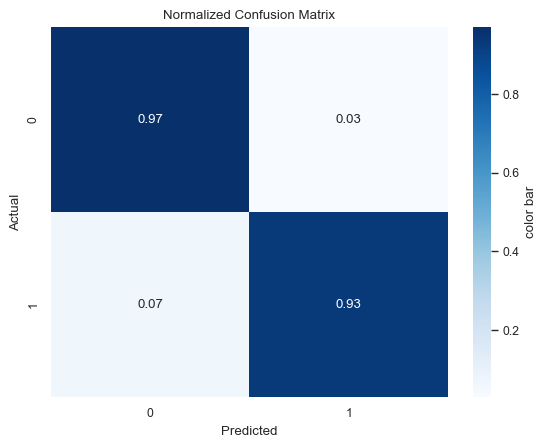

In [426]:
print("Normalized Confusion Matrix:")
cm_normalized1=np.round(conf_matrix/np.sum(conf_matrix,axis=1).reshape(-1,1),2)
print(cm_normalized1)
# --- ---- ---- heatmap
sns.heatmap(cm_normalized1, cmap="Blues", annot=True,
            cbar_kws={"orientation": "vertical", "label": "color bar"},
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Normalized Confusion Matrix")
plt.show()


true positives = 93%  
true negatives = 97%  
false positives = 3%  
false negatives = 7%  

the model is considered a good fit


**calculate the next metrics** 
* Accuracy : is the proportion of correct predictions.
* Sensitivity : is the proportion of true positives.
* Specificty : is the proportion of true negatives.

In [429]:
# prepare the calculation
TN=conf_matrix[0,0]
FP=conf_matrix[0,1]
FN=conf_matrix[1,0]
TP=conf_matrix[1,1]
# Accuracy
Accuracy = (TN+TP)/(TN+FP+FP+FN)
# Sensitivity
Sensitivity= TP/(TP+FN)
# Specificty
Specificty=TN/(TN+FP)
print('Accuracy :',Accuracy)
print('Sensitivity :',Sensitivity)
print('Specificty :',Specificty)

Accuracy : 1.7159757801583606
Sensitivity : 0.9309950041631974
Specificty : 0.9695109474114999
